In [7]:
%matplotlib notebook

In [8]:
import numpy as np
import pandas as pd
import torch
import gym
import os
import sys
import time

import hvplot.pandas  
from pathlib import Path

import utils
import TD3

# PPO, static env 

In [9]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

In [10]:
env_version = '7'

In [11]:
from gym.envs.registration import registry, make, spec

def register(id, *args, **kwargs):
    if id in registry.env_specs:
        return
    else:
        return gym.envs.registration.register(id, *args, **kwargs)

register(id='BattleshipEnv-v' + env_version,
         entry_point='battleship_gym_v' + env_version +':BattleshipEnvClass',
         max_episode_steps=500,
         reward_threshold=2500000.0)

### Train new model 

In [12]:
timestr = time.strftime("%Y%m%d-%H%M%S")
log_dir = f"tmp/{timestr}/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make("BattleshipEnv-v" + env_version)
env = Monitor(env, log_dir)
model = PPO('MlpPolicy', env, verbose=2)
model.learn(total_timesteps=2e6)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 325      |
|    ep_rew_mean     | 130      |
| time/              |          |
|    fps             | 1988     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 348         |
|    ep_rew_mean          | 111         |
| time/                   |             |
|    fps                  | 1236        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010522061 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_varia

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 351         |
|    ep_rew_mean          | 113         |
| time/                   |             |
|    fps                  | 938         |
|    iterations           | 11          |
|    time_elapsed         | 24          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.011756558 |
|    clip_fraction        | 0.086       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.109       |
|    learning_rate        | 0.0003      |
|    loss                 | 33.4        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 54.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 350 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 349         |
|    ep_rew_mean          | 111         |
| time/                   |             |
|    fps                  | 932         |
|    iterations           | 21          |
|    time_elapsed         | 46          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.013975205 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.21        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 28.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 348   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 108         |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 31          |
|    time_elapsed         | 68          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.014284631 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.52       |
|    explained_variance   | 0.434       |
|    learning_rate        | 0.0003      |
|    loss                 | 23.4        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0418     |
|    value_loss           | 33.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 364   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 365         |
|    ep_rew_mean          | 103         |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 41          |
|    time_elapsed         | 90          |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.014449562 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.49       |
|    explained_variance   | 0.379       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.41        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0371     |
|    value_loss           | 37.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 367   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 367         |
|    ep_rew_mean          | 95.3        |
| time/                   |             |
|    fps                  | 926         |
|    iterations           | 51          |
|    time_elapsed         | 112         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.016662052 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.42       |
|    explained_variance   | 0.535       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.5        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0425     |
|    value_loss           | 19.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 392         |
|    ep_rew_mean          | 85.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 61          |
|    time_elapsed         | 135         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.012215983 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.43       |
|    explained_variance   | 0.154       |
|    learning_rate        | 0.0003      |
|    loss                 | 45          |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0341     |
|    value_loss           | 64.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 392   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 411         |
|    ep_rew_mean          | 81.5        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 71          |
|    time_elapsed         | 157         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.018418059 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.38       |
|    explained_variance   | 0.424       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.89        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0393     |
|    value_loss           | 22.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 413     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 422          |
|    ep_rew_mean          | 80.5         |
| time/                   |              |
|    fps                  | 921          |
|    iterations           | 81           |
|    time_elapsed         | 180          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0133001795 |
|    clip_fraction        | 0.13         |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.37        |
|    explained_variance   | 0.263        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.24         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.0354      |
|    value_loss           | 61.2         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 430         |
|    ep_rew_mean          | 73.2        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 91          |
|    time_elapsed         | 203         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.013122128 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.3        |
|    explained_variance   | -0.00759    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.98        |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 43          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 431     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 440         |
|    ep_rew_mean          | 68.1        |
| time/                   |             |
|    fps                  | 912         |
|    iterations           | 101         |
|    time_elapsed         | 226         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.013089359 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.31       |
|    explained_variance   | 0.176       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.8        |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 37.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 443   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 448         |
|    ep_rew_mean          | 64.3        |
| time/                   |             |
|    fps                  | 912         |
|    iterations           | 111         |
|    time_elapsed         | 249         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.015914872 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.3        |
|    explained_variance   | 0.269       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.34        |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0358     |
|    value_loss           | 29.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 459         |
|    ep_rew_mean          | 56.5        |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 121         |
|    time_elapsed         | 271         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.012231794 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.27       |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | 26.3        |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0301     |
|    value_loss           | 28.8        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 459     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 459         |
|    ep_rew_mean          | 52          |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 131         |
|    time_elapsed         | 293         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.019290544 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | -0.0116     |
|    learning_rate        | 0.0003      |
|    loss                 | 3           |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0342     |
|    value_loss           | 16.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 458   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 448         |
|    ep_rew_mean          | 58.4        |
| time/                   |             |
|    fps                  | 913         |
|    iterations           | 141         |
|    time_elapsed         | 316         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.024346182 |
|    clip_fraction        | 0.247       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.28       |
|    explained_variance   | 0.403       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.48        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0423     |
|    value_loss           | 12.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 451   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 446         |
|    ep_rew_mean          | 63.4        |
| time/                   |             |
|    fps                  | 914         |
|    iterations           | 151         |
|    time_elapsed         | 338         |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.023513433 |
|    clip_fraction        | 0.232       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.26       |
|    explained_variance   | 0.219       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.97        |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0387     |
|    value_loss           | 18.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 445   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 457         |
|    ep_rew_mean          | 57.5        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 161         |
|    time_elapsed         | 360         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.022986187 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | 0.43        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.614       |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0538     |
|    value_loss           | 3.16        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 462   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | 54.6        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 171         |
|    time_elapsed         | 382         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.028351154 |
|    clip_fraction        | 0.298       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.59        |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0524     |
|    value_loss           | 3.83        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 471     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 470         |
|    ep_rew_mean          | 55.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 181         |
|    time_elapsed         | 404         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.016744409 |
|    clip_fraction        | 0.168       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.22       |
|    explained_variance   | 0.25        |
|    learning_rate        | 0.0003      |
|    loss                 | 9.63        |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0324     |
|    value_loss           | 22.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 468   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | 49.5        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 191         |
|    time_elapsed         | 426         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.019176077 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | 0.135       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.26        |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.035      |
|    value_loss           | 20.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 472   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 462        |
|    ep_rew_mean          | 50.4       |
| time/                   |            |
|    fps                  | 916        |
|    iterations           | 201        |
|    time_elapsed         | 449        |
|    total_timesteps      | 411648     |
| train/                  |            |
|    approx_kl            | 0.01655021 |
|    clip_fraction        | 0.188      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.17      |
|    explained_variance   | 0.391      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.35       |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0272    |
|    value_loss           | 22         |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 462        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478         |
|    ep_rew_mean          | 43.8        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 211         |
|    time_elapsed         | 471         |
|    total_timesteps      | 432128      |
| train/                  |             |
|    approx_kl            | 0.022039572 |
|    clip_fraction        | 0.305       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.502       |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.0465     |
|    value_loss           | 2.44        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 475   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478         |
|    ep_rew_mean          | 42.4        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 221         |
|    time_elapsed         | 494         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.018004298 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.13       |
|    explained_variance   | 0.13        |
|    learning_rate        | 0.0003      |
|    loss                 | 2.38        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0322     |
|    value_loss           | 18.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 478   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481         |
|    ep_rew_mean          | 38.2        |
| time/                   |             |
|    fps                  | 915         |
|    iterations           | 231         |
|    time_elapsed         | 516         |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.032294553 |
|    clip_fraction        | 0.348       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.08       |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0649      |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0614     |
|    value_loss           | 0.661       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 477   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 42.2        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 241         |
|    time_elapsed         | 538         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.021894764 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.02       |
|    explained_variance   | 0.696       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.54        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.046      |
|    value_loss           | 2.51        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 473         |
|    ep_rew_mean          | 40.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 251         |
|    time_elapsed         | 560         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.026330657 |
|    clip_fraction        | 0.277       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.94       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.166       |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.0526     |
|    value_loss           | 0.933       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 473   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 39.7        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 261         |
|    time_elapsed         | 583         |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.011216842 |
|    clip_fraction        | 0.0866      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.12       |
|    explained_variance   | -0.175      |
|    learning_rate        | 0.0003      |
|    loss                 | 13.2        |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0272     |
|    value_loss           | 49          |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 477   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 42          |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 271         |
|    time_elapsed         | 604         |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.029654004 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.99       |
|    explained_variance   | 0.774       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.185       |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.0556     |
|    value_loss           | 1.47        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 472   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 470         |
|    ep_rew_mean          | 46          |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 281         |
|    time_elapsed         | 627         |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.008769423 |
|    clip_fraction        | 0.0865      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.97       |
|    explained_variance   | 0.04        |
|    learning_rate        | 0.0003      |
|    loss                 | 10.4        |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 65.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476         |
|    ep_rew_mean          | 44.7        |
| time/                   |             |
|    fps                  | 917         |
|    iterations           | 291         |
|    time_elapsed         | 649         |
|    total_timesteps      | 595968      |
| train/                  |             |
|    approx_kl            | 0.018440213 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.95       |
|    explained_variance   | 0.312       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.85        |
|    n_updates            | 2900        |
|    policy_gradient_loss | -0.0342     |
|    value_loss           | 19          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 475     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 468         |
|    ep_rew_mean          | 51.2        |
| time/                   |             |
|    fps                  | 918         |
|    iterations           | 301         |
|    time_elapsed         | 671         |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.011005289 |
|    clip_fraction        | 0.0942      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.08       |
|    explained_variance   | 0.0455      |
|    learning_rate        | 0.0003      |
|    loss                 | 27.5        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.0286     |
|    value_loss           | 77.8        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 467     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 474         |
|    ep_rew_mean          | 46.2        |
| time/                   |             |
|    fps                  | 919         |
|    iterations           | 311         |
|    time_elapsed         | 693         |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.016701061 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.1        |
|    explained_variance   | 0.232       |
|    learning_rate        | 0.0003      |
|    loss                 | 12          |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 23.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 476   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 479         |
|    ep_rew_mean          | 45.8        |
| time/                   |             |
|    fps                  | 919         |
|    iterations           | 321         |
|    time_elapsed         | 714         |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.014356662 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.01       |
|    explained_variance   | 0.403       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.9        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 22.4        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 480     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 488        |
|    ep_rew_mean          | 38.1       |
| time/                   |            |
|    fps                  | 920        |
|    iterations           | 331        |
|    time_elapsed         | 736        |
|    total_timesteps      | 677888     |
| train/                  |            |
|    approx_kl            | 0.02583126 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.96      |
|    explained_variance   | 0.585      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.175      |
|    n_updates            | 3300       |
|    policy_gradient_loss | -0.0461    |
|    value_loss           | 1.53       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 488         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 482         |
|    ep_rew_mean          | 43.9        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 341         |
|    time_elapsed         | 758         |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.017687121 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.292       |
|    learning_rate        | 0.0003      |
|    loss                 | 46          |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.0306     |
|    value_loss           | 27.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 483   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 479         |
|    ep_rew_mean          | 42.4        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 351         |
|    time_elapsed         | 780         |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.019606901 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.118       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.73        |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.03       |
|    value_loss           | 24.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481         |
|    ep_rew_mean          | 39.5        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 361         |
|    time_elapsed         | 803         |
|    total_timesteps      | 739328      |
| train/                  |             |
|    approx_kl            | 0.033656724 |
|    clip_fraction        | 0.33        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.94       |
|    explained_variance   | 0.822       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.101       |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0539     |
|    value_loss           | 0.975       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 481   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | 35.9        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 371         |
|    time_elapsed         | 825         |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.015637865 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.02       |
|    explained_variance   | 0.0334      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.554       |
|    n_updates            | 3700        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 29          |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 489     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 482         |
|    ep_rew_mean          | 38.4        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 381         |
|    time_elapsed         | 847         |
|    total_timesteps      | 780288      |
| train/                  |             |
|    approx_kl            | 0.010510165 |
|    clip_fraction        | 0.0713      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.0407      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.76        |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 47.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 482 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480         |
|    ep_rew_mean          | 38.8        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 391         |
|    time_elapsed         | 869         |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.017039817 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4          |
|    explained_variance   | 0.0929      |
|    learning_rate        | 0.0003      |
|    loss                 | 23          |
|    n_updates            | 3900        |
|    policy_gradient_loss | -0.0291     |
|    value_loss           | 22.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 485        |
|    ep_rew_mean          | 37.1       |
| time/                   |            |
|    fps                  | 921        |
|    iterations           | 401        |
|    time_elapsed         | 891        |
|    total_timesteps      | 821248     |
| train/                  |            |
|    approx_kl            | 0.02394405 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.99      |
|    explained_variance   | 0.721      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.213      |
|    n_updates            | 4000       |
|    policy_gradient_loss | -0.0477    |
|    value_loss           | 0.753      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 32.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 411         |
|    time_elapsed         | 913         |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.028878743 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.631       |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.0446     |
|    value_loss           | 1.06        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490         |
|    ep_rew_mean          | 33.2        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 421         |
|    time_elapsed         | 935         |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.024239939 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.86       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.195       |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.0527     |
|    value_loss           | 0.831       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | 33.3        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 431         |
|    time_elapsed         | 957         |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.015849322 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.86       |
|    explained_variance   | 0.226       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.63        |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.0267     |
|    value_loss           | 26.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 490         |
|    ep_rew_mean          | 33.4        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 441         |
|    time_elapsed         | 979         |
|    total_timesteps      | 903168      |
| train/                  |             |
|    approx_kl            | 0.026742255 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.83       |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0338      |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.0485     |
|    value_loss           | 0.516       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 35.6        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 451         |
|    time_elapsed         | 1002        |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.017264187 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.8        |
|    explained_variance   | 0.0382      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.692       |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.0273     |
|    value_loss           | 26.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 487        |
|    ep_rew_mean          | 39.6       |
| time/                   |            |
|    fps                  | 922        |
|    iterations           | 461        |
|    time_elapsed         | 1023       |
|    total_timesteps      | 944128     |
| train/                  |            |
|    approx_kl            | 0.03435421 |
|    clip_fraction        | 0.354      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.87      |
|    explained_variance   | 0.838      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0111     |
|    n_updates            | 4600       |
|    policy_gradient_loss | -0.0562    |
|    value_loss           | 0.755      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 487        |
|    ep_rew_mean          | 39.6       |
| time/                   |            |
|    fps                  | 922        |
|    iterations           | 471        |
|    time_elapsed         | 1046       |
|    total_timesteps      | 964608     |
| train/                  |            |
|    approx_kl            | 0.03219574 |
|    clip_fraction        | 0.352      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.82      |
|    explained_variance   | 0.862      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.344      |
|    n_updates            | 4700       |
|    policy_gradient_loss | -0.0578    |
|    value_loss           | 1.43       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 487         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485         |
|    ep_rew_mean          | 38.5        |
| time/                   |             |
|    fps                  | 921         |
|    iterations           | 481         |
|    time_elapsed         | 1068        |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.011138739 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.327       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.58        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 30.8        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 485       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485         |
|    ep_rew_mean          | 34.4        |
| time/                   |             |
|    fps                  | 923         |
|    iterations           | 491         |
|    time_elapsed         | 1088        |
|    total_timesteps      | 1005568     |
| train/                  |             |
|    approx_kl            | 0.020715836 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.76       |
|    explained_variance   | 0.221       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.255       |
|    n_updates            | 4900        |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 19.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 485   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 486          |
|    ep_rew_mean          | 34           |
| time/                   |              |
|    fps                  | 927          |
|    iterations           | 501          |
|    time_elapsed         | 1106         |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0075576226 |
|    clip_fraction        | 0.0481       |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.79        |
|    explained_variance   | -0.0164      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.55         |
|    n_updates            | 5000         |
|    policy_gradient_loss | -0.0165      |
|    value_loss           | 48.1         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 30          |
| time/                   |             |
|    fps                  | 930         |
|    iterations           | 511         |
|    time_elapsed         | 1124        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.014121622 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.28        |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 22.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 29.8        |
| time/                   |             |
|    fps                  | 933         |
|    iterations           | 521         |
|    time_elapsed         | 1142        |
|    total_timesteps      | 1067008     |
| train/                  |             |
|    approx_kl            | 0.024189409 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.71       |
|    explained_variance   | 0.504       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0603      |
|    n_updates            | 5200        |
|    policy_gradient_loss | -0.0469     |
|    value_loss           | 0.667       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 29.6        |
| time/                   |             |
|    fps                  | 936         |
|    iterations           | 531         |
|    time_elapsed         | 1160        |
|    total_timesteps      | 1087488     |
| train/                  |             |
|    approx_kl            | 0.027089125 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.76       |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.122       |
|    n_updates            | 5300        |
|    policy_gradient_loss | -0.0488     |
|    value_loss           | 0.607       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 493       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 940         |
|    iterations           | 541         |
|    time_elapsed         | 1178        |
|    total_timesteps      | 1107968     |
| train/                  |             |
|    approx_kl            | 0.023053857 |
|    clip_fraction        | 0.284       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.69       |
|    explained_variance   | 0.628       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0343      |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.0478     |
|    value_loss           | 0.84        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 494     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 494       |
|    ep_rew_mean          | 31.6      |
| time/                   |           |
|    fps                  | 942       |
|    iterations           | 551       |
|    time_elapsed         | 1197      |
|    total_timesteps      | 1128448   |
| train/                  |           |
|    approx_kl            | 0.0236475 |
|    clip_fraction        | 0.282     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.77     |
|    explained_variance   | 0.489     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.212     |
|    n_updates            | 5500      |
|    policy_gradient_loss | -0.047    |
|    value_loss           | 1.09      |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 32.8  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 31.2        |
| time/                   |             |
|    fps                  | 945         |
|    iterations           | 561         |
|    time_elapsed         | 1215        |
|    total_timesteps      | 1148928     |
| train/                  |             |
|    approx_kl            | 0.028438846 |
|    clip_fraction        | 0.32        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.74       |
|    explained_variance   | 0.291       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0706      |
|    n_updates            | 5600        |
|    policy_gradient_loss | -0.0503     |
|    value_loss           | 0.69        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 32.5        |
| time/                   |             |
|    fps                  | 947         |
|    iterations           | 571         |
|    time_elapsed         | 1234        |
|    total_timesteps      | 1169408     |
| train/                  |             |
|    approx_kl            | 0.028845597 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.84       |
|    explained_variance   | 0.67        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0968      |
|    n_updates            | 5700        |
|    policy_gradient_loss | -0.0511     |
|    value_loss           | 0.889       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.8        |
| time/                   |             |
|    fps                  | 949         |
|    iterations           | 581         |
|    time_elapsed         | 1252        |
|    total_timesteps      | 1189888     |
| train/                  |             |
|    approx_kl            | 0.028038215 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.81       |
|    explained_variance   | 0.827       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0552      |
|    n_updates            | 5800        |
|    policy_gradient_loss | -0.0527     |
|    value_loss           | 0.403       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.6        |
| time/                   |             |
|    fps                  | 952         |
|    iterations           | 591         |
|    time_elapsed         | 1271        |
|    total_timesteps      | 1210368     |
| train/                  |             |
|    approx_kl            | 0.029315524 |
|    clip_fraction        | 0.345       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.73       |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0586      |
|    n_updates            | 5900        |
|    policy_gradient_loss | -0.0536     |
|    value_loss           | 0.412       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 26.6        |
| time/                   |             |
|    fps                  | 954         |
|    iterations           | 601         |
|    time_elapsed         | 1289        |
|    total_timesteps      | 1230848     |
| train/                  |             |
|    approx_kl            | 0.027996805 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.8        |
|    explained_variance   | 0.583       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0232      |
|    n_updates            | 6000        |
|    policy_gradient_loss | -0.0485     |
|    value_loss           | 0.693       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 498     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 30.8        |
| time/                   |             |
|    fps                  | 957         |
|    iterations           | 611         |
|    time_elapsed         | 1307        |
|    total_timesteps      | 1251328     |
| train/                  |             |
|    approx_kl            | 0.010129735 |
|    clip_fraction        | 0.0749      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.67       |
|    explained_variance   | 0.117       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.4        |
|    n_updates            | 6100        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 37.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 31          |
| time/                   |             |
|    fps                  | 958         |
|    iterations           | 621         |
|    time_elapsed         | 1326        |
|    total_timesteps      | 1271808     |
| train/                  |             |
|    approx_kl            | 0.018425055 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.69       |
|    explained_variance   | 0.0249      |
|    learning_rate        | 0.0003      |
|    loss                 | 35.7        |
|    n_updates            | 6200        |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 23.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 31          |
| time/                   |             |
|    fps                  | 960         |
|    iterations           | 631         |
|    time_elapsed         | 1346        |
|    total_timesteps      | 1292288     |
| train/                  |             |
|    approx_kl            | 0.028116683 |
|    clip_fraction        | 0.325       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.63       |
|    explained_variance   | 0.869       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0153      |
|    n_updates            | 6300        |
|    policy_gradient_loss | -0.054      |
|    value_loss           | 0.401       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 26.5        |
| time/                   |             |
|    fps                  | 960         |
|    iterations           | 641         |
|    time_elapsed         | 1366        |
|    total_timesteps      | 1312768     |
| train/                  |             |
|    approx_kl            | 0.016316952 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.58       |
|    explained_variance   | -0.113      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.44        |
|    n_updates            | 6400        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 23.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 27.6        |
| time/                   |             |
|    fps                  | 961         |
|    iterations           | 651         |
|    time_elapsed         | 1386        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.013166364 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.64       |
|    explained_variance   | 0.128       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.2        |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 22.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 29.3        |
| time/                   |             |
|    fps                  | 963         |
|    iterations           | 661         |
|    time_elapsed         | 1404        |
|    total_timesteps      | 1353728     |
| train/                  |             |
|    approx_kl            | 0.032693464 |
|    clip_fraction        | 0.322       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.55       |
|    explained_variance   | 0.831       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0381      |
|    n_updates            | 6600        |
|    policy_gradient_loss | -0.0531     |
|    value_loss           | 0.426       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 27.4        |
| time/                   |             |
|    fps                  | 965         |
|    iterations           | 671         |
|    time_elapsed         | 1423        |
|    total_timesteps      | 1374208     |
| train/                  |             |
|    approx_kl            | 0.025420986 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.56       |
|    explained_variance   | 0.713       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0531      |
|    n_updates            | 6700        |
|    policy_gradient_loss | -0.0471     |
|    value_loss           | 0.368       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 495     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 25.5       |
| time/                   |            |
|    fps                  | 966        |
|    iterations           | 681        |
|    time_elapsed         | 1443       |
|    total_timesteps      | 1394688    |
| train/                  |            |
|    approx_kl            | 0.02748283 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.6       |
|    explained_variance   | 0.788      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.039      |
|    n_updates            | 6800       |
|    policy_gradient_loss | -0.0496    |
|    value_loss           | 0.527      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 24.5        |
| time/                   |             |
|    fps                  | 966         |
|    iterations           | 691         |
|    time_elapsed         | 1463        |
|    total_timesteps      | 1415168     |
| train/                  |             |
|    approx_kl            | 0.030331189 |
|    clip_fraction        | 0.326       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.5        |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00558    |
|    n_updates            | 6900        |
|    policy_gradient_loss | -0.0561     |
|    value_loss           | 0.315       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 24          |
| time/                   |             |
|    fps                  | 968         |
|    iterations           | 701         |
|    time_elapsed         | 1482        |
|    total_timesteps      | 1435648     |
| train/                  |             |
|    approx_kl            | 0.016233504 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.123       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.66        |
|    n_updates            | 7000        |
|    policy_gradient_loss | -0.024      |
|    value_loss           | 25.3        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 23         |
| time/                   |            |
|    fps                  | 969        |
|    iterations           | 711        |
|    time_elapsed         | 1501       |
|    total_timesteps      | 1456128    |
| train/                  |            |
|    approx_kl            | 0.02545056 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.48      |
|    explained_variance   | 0.792      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0334     |
|    n_updates            | 7100       |
|    policy_gradient_loss | -0.0502    |
|    value_loss           | 0.496      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 970         |
|    iterations           | 721         |
|    time_elapsed         | 1521        |
|    total_timesteps      | 1476608     |
| train/                  |             |
|    approx_kl            | 0.025438525 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.528       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.277       |
|    n_updates            | 7200        |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 1.51        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 491         |
|    ep_rew_mean          | 27.9        |
| time/                   |             |
|    fps                  | 972         |
|    iterations           | 731         |
|    time_elapsed         | 1540        |
|    total_timesteps      | 1497088     |
| train/                  |             |
|    approx_kl            | 0.023879921 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.643       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.187       |
|    n_updates            | 7300        |
|    policy_gradient_loss | -0.0458     |
|    value_loss           | 0.809       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 491     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 492         |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 974         |
|    iterations           | 741         |
|    time_elapsed         | 1557        |
|    total_timesteps      | 1517568     |
| train/                  |             |
|    approx_kl            | 0.014959456 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | -0.0127     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.276       |
|    n_updates            | 7400        |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 21          |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496        |
|    ep_rew_mean          | 26.4       |
| time/                   |            |
|    fps                  | 975        |
|    iterations           | 751        |
|    time_elapsed         | 1576       |
|    total_timesteps      | 1538048    |
| train/                  |            |
|    approx_kl            | 0.02546031 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.25      |
|    explained_variance   | 0.757      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.05       |
|    n_updates            | 7500       |
|    policy_gradient_loss | -0.0451    |
|    value_loss           | 0.392      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 493         |
|    ep_rew_mean          | 27.2        |
| time/                   |             |
|    fps                  | 977         |
|    iterations           | 761         |
|    time_elapsed         | 1594        |
|    total_timesteps      | 1558528     |
| train/                  |             |
|    approx_kl            | 0.029143315 |
|    clip_fraction        | 0.369       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.56       |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0592      |
|    n_updates            | 7600        |
|    policy_gradient_loss | -0.0525     |
|    value_loss           | 0.407       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 27.7        |
| time/                   |             |
|    fps                  | 978         |
|    iterations           | 771         |
|    time_elapsed         | 1612        |
|    total_timesteps      | 1579008     |
| train/                  |             |
|    approx_kl            | 0.025785886 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.58       |
|    explained_variance   | 0.614       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0194      |
|    n_updates            | 7700        |
|    policy_gradient_loss | -0.0449     |
|    value_loss           | 0.825       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 27.4        |
| time/                   |             |
|    fps                  | 980         |
|    iterations           | 781         |
|    time_elapsed         | 1631        |
|    total_timesteps      | 1599488     |
| train/                  |             |
|    approx_kl            | 0.018481366 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.243       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.577       |
|    n_updates            | 7800        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 19.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 31.5        |
| time/                   |             |
|    fps                  | 981         |
|    iterations           | 791         |
|    time_elapsed         | 1649        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.038134716 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.24       |
|    explained_variance   | 0.465       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.117       |
|    n_updates            | 7900        |
|    policy_gradient_loss | -0.0462     |
|    value_loss           | 0.563       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496        |
|    ep_rew_mean          | 30.5       |
| time/                   |            |
|    fps                  | 983        |
|    iterations           | 801        |
|    time_elapsed         | 1667       |
|    total_timesteps      | 1640448    |
| train/                  |            |
|    approx_kl            | 0.01775333 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.5       |
|    explained_variance   | 0.221      |
|    learning_rate        | 0.0003     |
|    loss                 | 8.49       |
|    n_updates            | 8000       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 26         |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 25.2        |
| time/                   |             |
|    fps                  | 985         |
|    iterations           | 811         |
|    time_elapsed         | 1686        |
|    total_timesteps      | 1660928     |
| train/                  |             |
|    approx_kl            | 0.026108466 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.43       |
|    explained_variance   | 0.661       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0613      |
|    n_updates            | 8100        |
|    policy_gradient_loss | -0.0464     |
|    value_loss           | 0.37        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 22.8        |
| time/                   |             |
|    fps                  | 986         |
|    iterations           | 821         |
|    time_elapsed         | 1704        |
|    total_timesteps      | 1681408     |
| train/                  |             |
|    approx_kl            | 0.021843249 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0132      |
|    n_updates            | 8200        |
|    policy_gradient_loss | -0.0412     |
|    value_loss           | 0.342       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 24.4        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 831         |
|    time_elapsed         | 1723        |
|    total_timesteps      | 1701888     |
| train/                  |             |
|    approx_kl            | 0.016120963 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.46       |
|    explained_variance   | 0.0372      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.36        |
|    n_updates            | 8300        |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 24.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 26          |
| time/                   |             |
|    fps                  | 986         |
|    iterations           | 841         |
|    time_elapsed         | 1745        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.028497556 |
|    clip_fraction        | 0.297       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.625       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0911      |
|    n_updates            | 8400        |
|    policy_gradient_loss | -0.042      |
|    value_loss           | 0.527       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24.2        |
| time/                   |             |
|    fps                  | 987         |
|    iterations           | 851         |
|    time_elapsed         | 1764        |
|    total_timesteps      | 1742848     |
| train/                  |             |
|    approx_kl            | 0.028208047 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.37       |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0655      |
|    n_updates            | 8500        |
|    policy_gradient_loss | -0.0488     |
|    value_loss           | 0.239       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 22.8        |
| time/                   |             |
|    fps                  | 988         |
|    iterations           | 861         |
|    time_elapsed         | 1784        |
|    total_timesteps      | 1763328     |
| train/                  |             |
|    approx_kl            | 0.028910933 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.49       |
|    explained_variance   | 0.82        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0195     |
|    n_updates            | 8600        |
|    policy_gradient_loss | -0.0535     |
|    value_loss           | 0.23        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 25.1        |
| time/                   |             |
|    fps                  | 988         |
|    iterations           | 871         |
|    time_elapsed         | 1803        |
|    total_timesteps      | 1783808     |
| train/                  |             |
|    approx_kl            | 0.025954846 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.639       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.133       |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.0442     |
|    value_loss           | 0.477       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 24.9        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 881         |
|    time_elapsed         | 1822        |
|    total_timesteps      | 1804288     |
| train/                  |             |
|    approx_kl            | 0.027039593 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.34       |
|    explained_variance   | 0.77        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0504      |
|    n_updates            | 8800        |
|    policy_gradient_loss | -0.0421     |
|    value_loss           | 0.405       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 28.3        |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 891         |
|    time_elapsed         | 1841        |
|    total_timesteps      | 1824768     |
| train/                  |             |
|    approx_kl            | 0.026567891 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.52        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.483       |
|    n_updates            | 8900        |
|    policy_gradient_loss | -0.0473     |
|    value_loss           | 0.765       |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 494       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494         |
|    ep_rew_mean          | 27          |
| time/                   |             |
|    fps                  | 991         |
|    iterations           | 901         |
|    time_elapsed         | 1861        |
|    total_timesteps      | 1845248     |
| train/                  |             |
|    approx_kl            | 0.024269484 |
|    clip_fraction        | 0.243       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.91       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0206      |
|    n_updates            | 9000        |
|    policy_gradient_loss | -0.0404     |
|    value_loss           | 0.272       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 494   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499        |
|    ep_rew_mean          | 22.5       |
| time/                   |            |
|    fps                  | 992        |
|    iterations           | 911        |
|    time_elapsed         | 1880       |
|    total_timesteps      | 1865728    |
| train/                  |            |
|    approx_kl            | 0.03416737 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.25      |
|    explained_variance   | 0.872      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0472    |
|    n_updates            | 9100       |
|    policy_gradient_loss | -0.0501    |
|    value_loss           | 0.216      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 22.3        |
| time/                   |             |
|    fps                  | 993         |
|    iterations           | 921         |
|    time_elapsed         | 1898        |
|    total_timesteps      | 1886208     |
| train/                  |             |
|    approx_kl            | 0.028203432 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.23       |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0833      |
|    n_updates            | 9200        |
|    policy_gradient_loss | -0.047      |
|    value_loss           | 0.326       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 21.3        |
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 931         |
|    time_elapsed         | 1917        |
|    total_timesteps      | 1906688     |
| train/                  |             |
|    approx_kl            | 0.028719235 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.51       |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0346      |
|    n_updates            | 9300        |
|    policy_gradient_loss | -0.0474     |
|    value_loss           | 0.275       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499        |
|    ep_rew_mean          | 22.6       |
| time/                   |            |
|    fps                  | 994        |
|    iterations           | 941        |
|    time_elapsed         | 1936       |
|    total_timesteps      | 1927168    |
| train/                  |            |
|    approx_kl            | 0.02258313 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.27      |
|    explained_variance   | 0.746      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0129     |
|    n_updates            | 9400       |
|    policy_gradient_loss | -0.0457    |
|    value_loss           | 0.283      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24          |
| time/                   |             |
|    fps                  | 996         |
|    iterations           | 951         |
|    time_elapsed         | 1955        |
|    total_timesteps      | 1947648     |
| train/                  |             |
|    approx_kl            | 0.034815107 |
|    clip_fraction        | 0.292       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.95       |
|    explained_variance   | 0.415       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00754     |
|    n_updates            | 9500        |
|    policy_gradient_loss | -0.0462     |
|    value_loss           | 0.566       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 25.1        |
| time/                   |             |
|    fps                  | 997         |
|    iterations           | 961         |
|    time_elapsed         | 1973        |
|    total_timesteps      | 1968128     |
| train/                  |             |
|    approx_kl            | 0.034055077 |
|    clip_fraction        | 0.317       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.42       |
|    explained_variance   | 0.701       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.048       |
|    n_updates            | 9600        |
|    policy_gradient_loss | -0.0528     |
|    value_loss           | 0.561       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 23         |
| time/                   |            |
|    fps                  | 998        |
|    iterations           | 971        |
|    time_elapsed         | 1992       |
|    total_timesteps      | 1988608    |
| train/                  |            |
|    approx_kl            | 0.02311815 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.47      |
|    explained_variance   | 0.74       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0407     |
|    n_updates            | 9700       |
|    policy_gradient_loss | -0.0471    |
|    value_loss           | 0.323      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_m

In [ ]:
model.learn(total_timesteps=5e6)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 24.8     |
| time/              |          |
|    fps             | 2521     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 24.4        |
| time/                   |             |
|    fps                  | 1526        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.021808209 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.766       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495         |
|    ep_rew_mean          | 24.6        |
| time/                   |             |
|    fps                  | 1163        |
|    iterations           | 11          |
|    time_elapsed         | 19          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.026320176 |
|    clip_fraction        | 0.313       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.44       |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0223      |
|    n_updates            | 9870        |
|    policy_gradient_loss | -0.0457     |
|    value_loss           | 0.287       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 495   

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 497       |
|    ep_rew_mean          | 24.7      |
| time/                   |           |
|    fps                  | 1125      |
|    iterations           | 21        |
|    time_elapsed         | 38        |
|    total_timesteps      | 43008     |
| train/                  |           |
|    approx_kl            | 0.0322557 |
|    clip_fraction        | 0.309     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.22     |
|    explained_variance   | 0.852     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.113     |
|    n_updates            | 9970      |
|    policy_gradient_loss | -0.0522   |
|    value_loss           | 0.472     |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 24.7     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 25          |
| time/                   |             |
|    fps                  | 1075        |
|    iterations           | 31          |
|    time_elapsed         | 59          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.028151575 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.4        |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0276     |
|    n_updates            | 10070       |
|    policy_gradient_loss | -0.0529     |
|    value_loss           | 0.287       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24.2        |
| time/                   |             |
|    fps                  | 1072        |
|    iterations           | 41          |
|    time_elapsed         | 78          |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.027863717 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.37       |
|    explained_variance   | 0.783       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0402     |
|    n_updates            | 10170       |
|    policy_gradient_loss | -0.0549     |
|    value_loss           | 0.301       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 25.5       |
| time/                   |            |
|    fps                  | 1076       |
|    iterations           | 51         |
|    time_elapsed         | 97         |
|    total_timesteps      | 104448     |
| train/                  |            |
|    approx_kl            | 0.03125816 |
|    clip_fraction        | 0.337      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.4       |
|    explained_variance   | 0.826      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.027      |
|    n_updates            | 10270      |
|    policy_gradient_loss | -0.0542    |
|    value_loss           | 0.381      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 496        |
|    ep_rew_mean          | 26.3       |
| time/                   |            |
|    fps                  | 1068       |
|    iterations           | 61         |
|    time_elapsed         | 116        |
|    total_timesteps      | 124928     |
| train/                  |            |
|    approx_kl            | 0.03234727 |
|    clip_fraction        | 0.313      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.46      |
|    explained_variance   | 0.699      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.014      |
|    n_updates            | 10370      |
|    policy_gradient_loss | -0.0472    |
|    value_loss           | 0.337      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 26.1        |
| time/                   |             |
|    fps                  | 1065        |
|    iterations           | 71          |
|    time_elapsed         | 136         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.024986852 |
|    clip_fraction        | 0.286       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.14       |
|    explained_variance   | 0.828       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0531     |
|    n_updates            | 10470       |
|    policy_gradient_loss | -0.049      |
|    value_loss           | 0.232       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 26.2        |
| time/                   |             |
|    fps                  | 1063        |
|    iterations           | 81          |
|    time_elapsed         | 155         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.013832088 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.28       |
|    explained_variance   | 0.245       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.1        |
|    n_updates            | 10570       |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 23.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 499     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 497       |
|    ep_rew_mean          | 26.4      |
| time/                   |           |
|    fps                  | 1069      |
|    iterations           | 91        |
|    time_elapsed         | 174       |
|    total_timesteps      | 186368    |
| train/                  |           |
|    approx_kl            | 0.0344627 |
|    clip_fraction        | 0.339     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.51     |
|    explained_variance   | 0.896     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0125   |
|    n_updates            | 10670     |
|    policy_gradient_loss | -0.0527   |
|    value_loss           | 0.242     |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 26.4  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 26.7        |
| time/                   |             |
|    fps                  | 1064        |
|    iterations           | 101         |
|    time_elapsed         | 194         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.030949201 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.15       |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0108      |
|    n_updates            | 10770       |
|    policy_gradient_loss | -0.0453     |
|    value_loss           | 0.425       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 24.7        |
| time/                   |             |
|    fps                  | 1060        |
|    iterations           | 111         |
|    time_elapsed         | 214         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.026563428 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.33       |
|    explained_variance   | 0.725       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00352    |
|    n_updates            | 10870       |
|    policy_gradient_loss | -0.0482     |
|    value_loss           | 0.369       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 23          |
| time/                   |             |
|    fps                  | 1064        |
|    iterations           | 121         |
|    time_elapsed         | 232         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.029761318 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.29       |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0403     |
|    n_updates            | 10970       |
|    policy_gradient_loss | -0.055      |
|    value_loss           | 0.166       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 21.9       |
| time/                   |            |
|    fps                  | 1068       |
|    iterations           | 131        |
|    time_elapsed         | 251        |
|    total_timesteps      | 268288     |
| train/                  |            |
|    approx_kl            | 0.03066081 |
|    clip_fraction        | 0.338      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.23      |
|    explained_variance   | 0.823      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.012      |
|    n_updates            | 11070      |
|    policy_gradient_loss | -0.0586    |
|    value_loss           | 0.33       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 22.8        |
| time/                   |             |
|    fps                  | 1073        |
|    iterations           | 141         |
|    time_elapsed         | 269         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.027648574 |
|    clip_fraction        | 0.303       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.41       |
|    explained_variance   | 0.785       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0181      |
|    n_updates            | 11170       |
|    policy_gradient_loss | -0.0451     |
|    value_loss           | 0.321       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 500        |
|    ep_rew_mean          | 22.7       |
| time/                   |            |
|    fps                  | 1078       |
|    iterations           | 151        |
|    time_elapsed         | 286        |
|    total_timesteps      | 309248     |
| train/                  |            |
|    approx_kl            | 0.03588228 |
|    clip_fraction        | 0.336      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.32      |
|    explained_variance   | 0.803      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0182    |
|    n_updates            | 11270      |
|    policy_gradient_loss | -0.0517    |
|    value_loss           | 0.293      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 22.4        |
| time/                   |             |
|    fps                  | 1081        |
|    iterations           | 161         |
|    time_elapsed         | 304         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.028094934 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.31       |
|    explained_variance   | 0.764       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0543      |
|    n_updates            | 11370       |
|    policy_gradient_loss | -0.0495     |
|    value_loss           | 0.313       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 498         |
|    ep_rew_mean          | 22.4        |
| time/                   |             |
|    fps                  | 1083        |
|    iterations           | 171         |
|    time_elapsed         | 323         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.023479939 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.27       |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0211      |
|    n_updates            | 11470       |
|    policy_gradient_loss | -0.0433     |
|    value_loss           | 0.267       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 498     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 21.1        |
| time/                   |             |
|    fps                  | 1085        |
|    iterations           | 181         |
|    time_elapsed         | 341         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.024485577 |
|    clip_fraction        | 0.287       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.22       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.01        |
|    n_updates            | 11570       |
|    policy_gradient_loss | -0.0481     |
|    value_loss           | 0.196       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 23          |
| time/                   |             |
|    fps                  | 1087        |
|    iterations           | 191         |
|    time_elapsed         | 359         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.016978713 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.04       |
|    explained_variance   | 0.0546      |
|    learning_rate        | 0.0003      |
|    loss                 | 20.6        |
|    n_updates            | 11670       |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 29.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 24.3        |
| time/                   |             |
|    fps                  | 1089        |
|    iterations           | 201         |
|    time_elapsed         | 377         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.027028397 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.25       |
|    explained_variance   | 0.827       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.022       |
|    n_updates            | 11770       |
|    policy_gradient_loss | -0.0483     |
|    value_loss           | 0.246       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497        |
|    ep_rew_mean          | 25.8       |
| time/                   |            |
|    fps                  | 1091       |
|    iterations           | 211        |
|    time_elapsed         | 396        |
|    total_timesteps      | 432128     |
| train/                  |            |
|    approx_kl            | 0.03482254 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.36      |
|    explained_variance   | 0.817      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0254     |
|    n_updates            | 11870      |
|    policy_gradient_loss | -0.0453    |
|    value_loss           | 0.578      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_m

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 496       |
|    ep_rew_mean          | 26.3      |
| time/                   |           |
|    fps                  | 1091      |
|    iterations           | 221       |
|    time_elapsed         | 414       |
|    total_timesteps      | 452608    |
| train/                  |           |
|    approx_kl            | 0.0236711 |
|    clip_fraction        | 0.282     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.38     |
|    explained_variance   | 0.714     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.109     |
|    n_updates            | 11970     |
|    policy_gradient_loss | -0.0426   |
|    value_loss           | 0.489     |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 25.4  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496         |
|    ep_rew_mean          | 25.5        |
| time/                   |             |
|    fps                  | 1089        |
|    iterations           | 231         |
|    time_elapsed         | 434         |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.035181284 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.18       |
|    explained_variance   | 0.779       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.025      |
|    n_updates            | 12070       |
|    policy_gradient_loss | -0.0542     |
|    value_loss           | 0.343       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 496   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 24.6        |
| time/                   |             |
|    fps                  | 1090        |
|    iterations           | 241         |
|    time_elapsed         | 452         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.026304103 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.12       |
|    explained_variance   | 0.79        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0184      |
|    n_updates            | 12170       |
|    policy_gradient_loss | -0.0478     |
|    value_loss           | 0.298       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 497     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 498        |
|    ep_rew_mean          | 23.8       |
| time/                   |            |
|    fps                  | 1089       |
|    iterations           | 251        |
|    time_elapsed         | 471        |
|    total_timesteps      | 514048     |
| train/                  |            |
|    approx_kl            | 0.03830778 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.29      |
|    explained_variance   | 0.864      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0237     |
|    n_updates            | 12270      |
|    policy_gradient_loss | -0.0478    |
|    value_loss           | 0.282      |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 498        |
|    ep_rew_mean

In [13]:
training_reward = pd.DataFrame(pd.to_numeric(pd.read_csv(f"{log_dir}monitor.csv")[1:].reset_index()['index'])).reset_index()
training_reward.rename(columns={'level_0':"Episode",'index':"Reward"},inplace=True)
training_reward.hvplot(x="Episode",y="Reward")

:Curve   [Episode]   (Reward)

### Save model 

In [14]:
timestr = time.strftime("%Y%m%d-%H%M%S")
model.save(f'models/{timestr}-nb10-ppo')

### Reload model 

In [8]:
model = PPO('MlpPolicy', env, verbose=0)
model.load('models/20211118-115136')

## Test RL Agent 

In [15]:
from rl_agent import RLAgent
from board import Board 
from battleship_gym_v7 import BattleshipEnvClass 
from static_board_v1 import ship_config

<IPython.core.display.Javascript object>


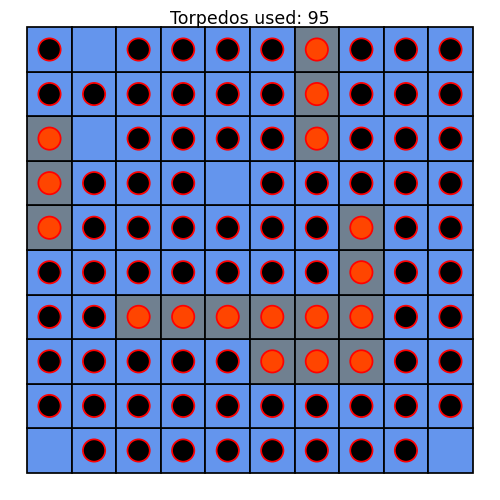

In [18]:
board = Board(10)

In [20]:
test_gym_env = BattleshipEnvClass()
agent = RLAgent(board, model, test_gym_env)
agent.play_until_completion()

96